In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
from apra_pop_models.math_module import xp
import apra_pop_models.props as props
from apra_pop_models.imshows import *


wavelength_c = 500e-9*u.m
pupil_diam = 10*u.mm
distance = 1000*u.mm


/home/apra/miniconda3/envs/gpu311env/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


/home/apra/Projects/apra-howfsc-models/apra_pop_models


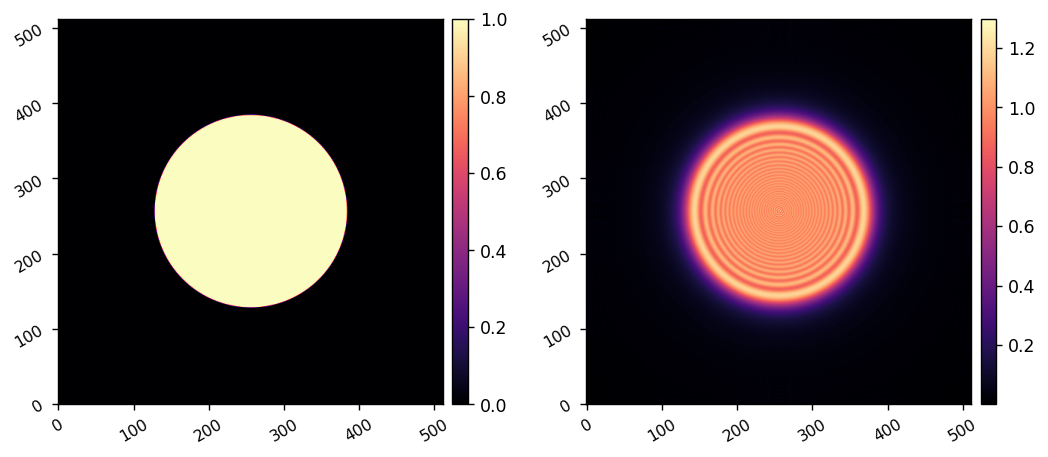

In [2]:
npix = 512
wf = poppy.FresnelWavefront(beam_radius=pupil_diam/2, npix=npix, oversample=1)
ap = poppy.CircularAperture(radius=pupil_diam/2).get_transmission(wf)

pixelscale = pupil_diam/(npix*u.pix)

prop_wf = props.ang_spec(ap, wavelength_c, distance, pixelscale)

imshow2(ap, xp.abs(prop_wf))

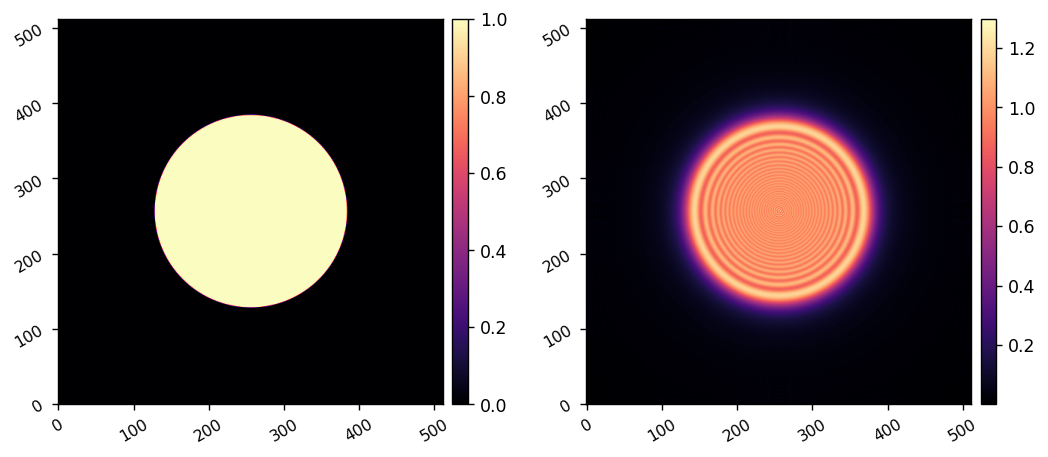

In [25]:
npix = 256
wf = poppy.FresnelWavefront(beam_radius=pupil_diam/2, npix=npix, oversample=2)
ap = poppy.CircularAperture(radius=pupil_diam/2).get_transmission(wf)

pixelscale = pupil_diam/(npix*u.pix)

reload(props)
wf_as, tf, prop_wf = props.ang_spec(ap, wavelength_c, distance, pixelscale)

imshow2(ap, xp.abs(prop_wf))

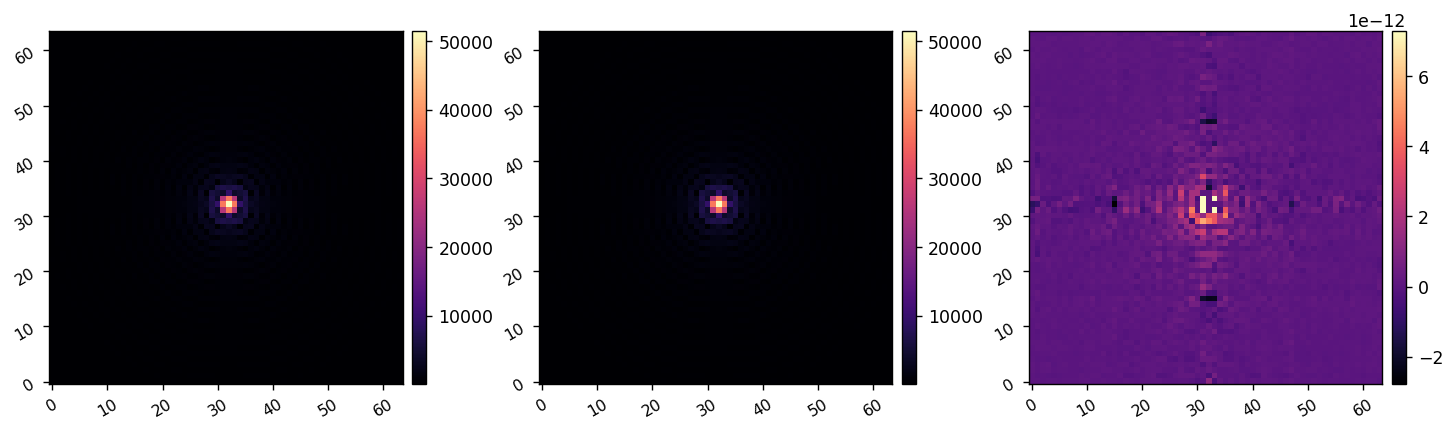

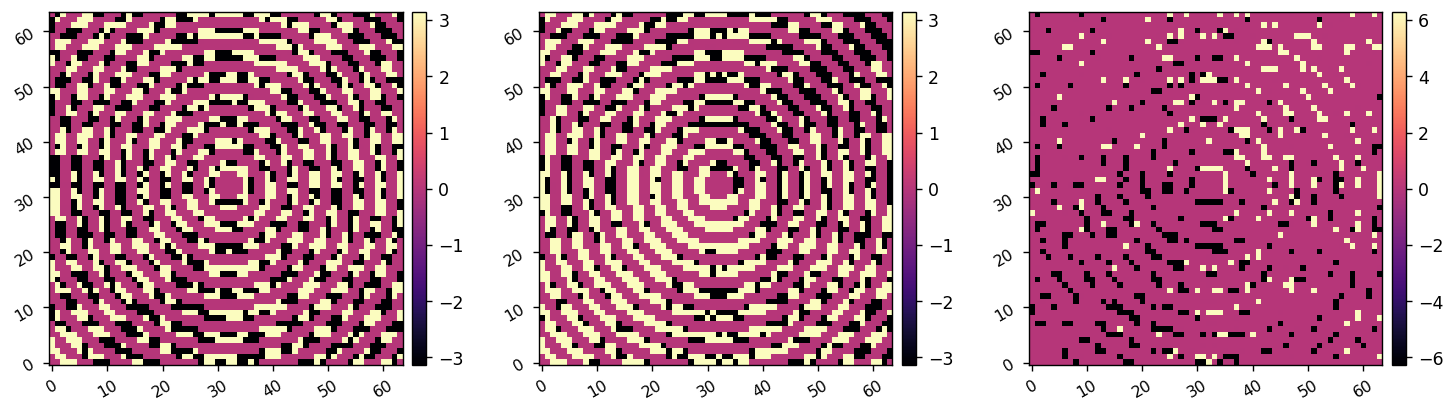

In [14]:
test_wf_as = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/as/one_result.csv', delimiter=',', dtype=np.complex128)

diff = xp.abs(wf_as).get() - np.abs(test_wf_as)
imshow3(xp.abs(wf_as), np.abs(test_wf_as), diff, npix=64)

diff = xp.angle(wf_as).get() - np.angle(test_wf_as)
imshow3(xp.angle(wf_as), np.angle(test_wf_as), diff, npix=64)

In [23]:
pixelscale.to_value(u.m/u.pix)

3.90625e-05

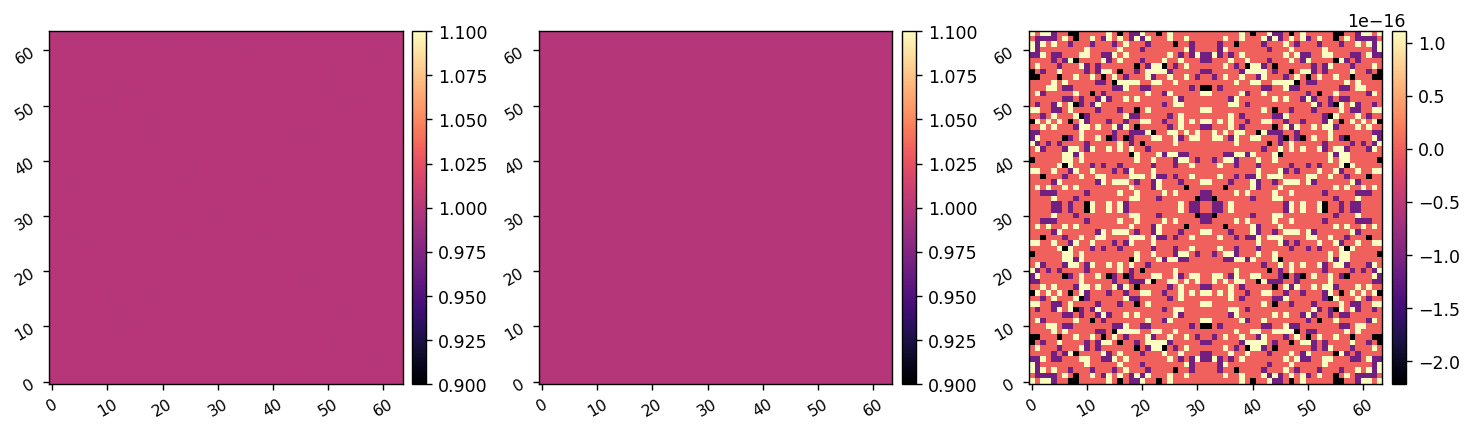

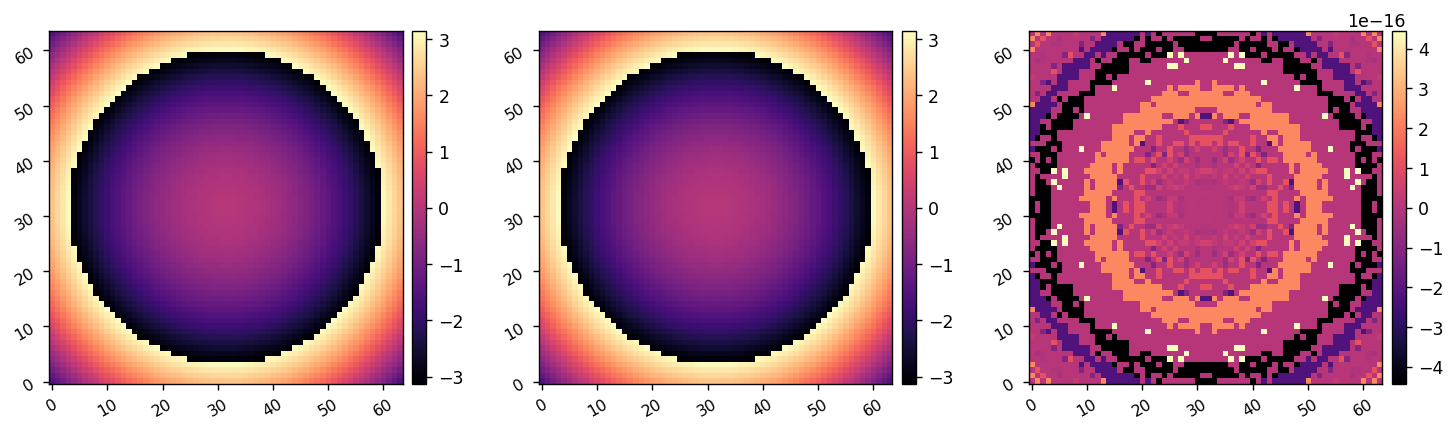

In [26]:
test_tf = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/as/tf.csv', delimiter=',', dtype=np.complex128)

diff = xp.abs(tf).get() - np.abs(test_tf)
imshow3(xp.abs(tf), np.abs(test_tf), diff, npix=64)

diff = xp.angle(tf).get() - np.angle(test_tf)
imshow3(xp.angle(tf), np.angle(test_tf), diff, npix=64)

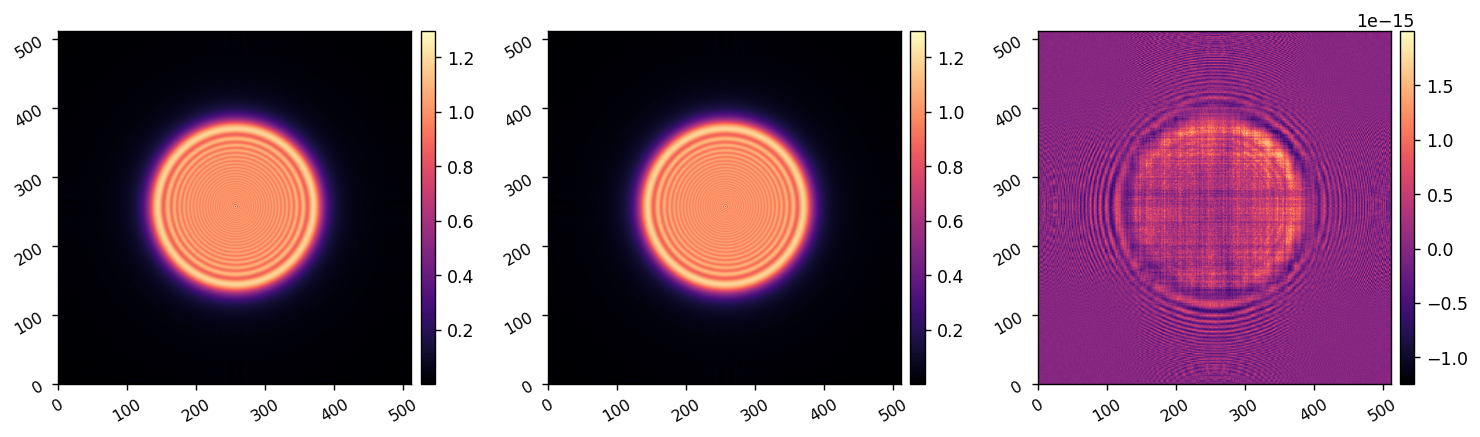

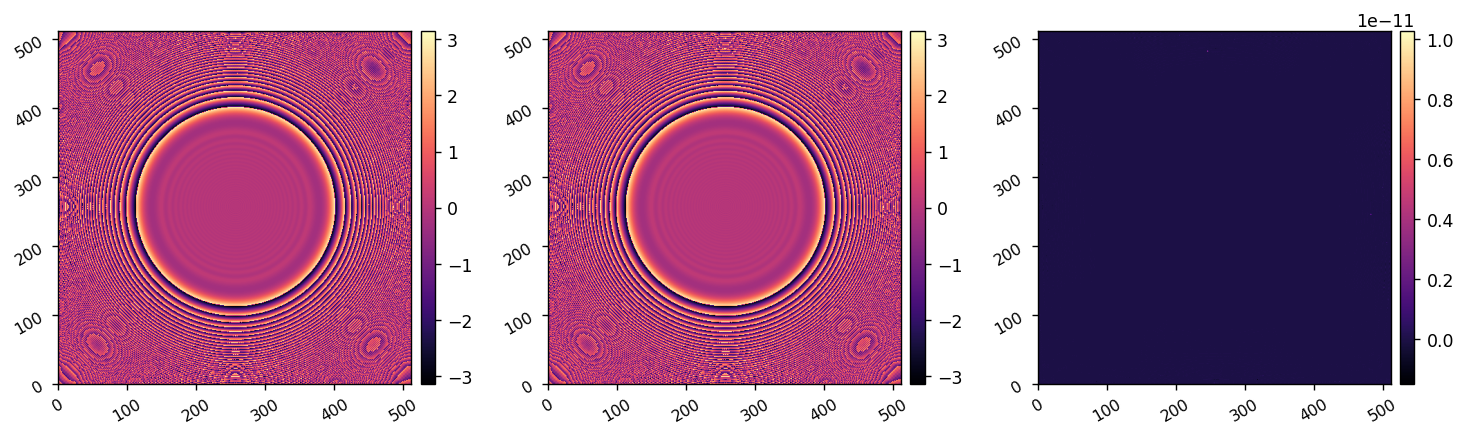

In [34]:
test_wf = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/as/test_ap_result.csv', delimiter=',', dtype=np.complex128)

diff = xp.abs(prop_wf).get() - np.abs(test_wf)
imshow3(xp.abs(prop_wf), np.abs(test_wf), diff)

diff = xp.angle(prop_wf).get() - np.angle(test_wf)
imshow3(xp.angle(prop_wf), np.angle(test_wf), diff)

# test MFT now

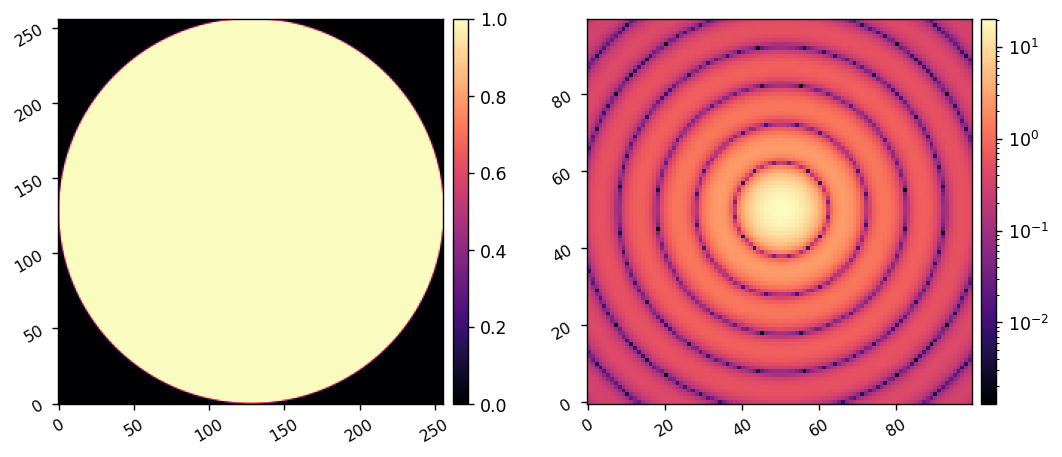

In [40]:
npix = 256
wf = poppy.FresnelWavefront(beam_radius=pupil_diam/2, npix=npix, oversample=1)
ap = poppy.CircularAperture(radius=pupil_diam/2).get_transmission(wf)

psf_pixelscale_lamD = 1/10
npsf = 100

fpwf = props.mft_forward(ap, psf_pixelscale_lamD, npsf)
imshow2(ap, xp.abs(fpwf), lognorm2=True)

np.savetxt("test_mft_ap.csv", ensure_np_array(ap), delimiter=",")
np.savetxt("test_mft_result.csv", ensure_np_array(fpwf), delimiter=",")
